In [10]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df_train = pd.read_json("train.json")
df_train

,Politics,Health,Finance,Travel,Food,Education,Environment,Fashion,Science,Sports,Technology,Entertainment
0,The mayor announced a new initiative to improv...,Regular exercise and a balanced diet are key t...,The stock market saw a significant drop follow...,Visiting the Grand Canyon is a breathtaking ex...,The new restaurant in town offers a fusion of ...,The school district is implementing a new curr...,Climate change is causing a significant rise i...,The new fashion trend is all about sustainabil...,NASA's Mars Rover has made significant discove...,The NBA Finals are set to begin next week with...,Artificial intelligence is changing the way we...,The new Marvel movie is breaking box office re...
1,The senator is facing criticism for her stance...,The World Health Organization has issued new g...,Investing in real estate can be a profitable v...,The tourism industry has been severely impacte...,Drinking eight glasses of water a day is essen...,Online learning has become increasingly popula...,Recycling and composting are effective ways to...,The annual Met Gala is a major event in the fa...,The Nobel Prize in Physics was awarded for bre...,Serena Williams continues to dominate the tenn...,The latest iPhone has a number of exciting new...,The Grammy Awards are a celebration of the bes...
2,The upcoming election has sparked intense deba...,A new study reveals the benefits of meditation...,The company's profits have doubled since the l...,Backpacking through Europe is a popular choice...,Cooking classes are a fun way to learn new rec...,The university is offering scholarships for st...,The Amazon rainforest is home to millions of u...,Vintage clothing has made a comeback in recent...,Genetic engineering is opening up new possibil...,The World Cup is the most prestigious tourname...,Cybersecurity is becoming increasingly importa...,The latest season of Game of Thrones had fans ...


In [12]:
def print_info(df):
    for category in df.columns:
        word_counts = df[category].apply(lambda x: len(x.split()))  
        mean_words = word_counts.mean()  
        max_words = word_counts.max()  
        min_words = word_counts.min()  
        total_words = word_counts.sum()  
        
        print(f"--- {category} ---")
        print(f"Nombre moyen de mots : {mean_words:.2f}")
        print(f"Nombre maximal de mots : {max_words}")
        print(f"Nombre minimal de mots : {min_words}")
        print(f"Total des mots : {total_words}")
        print("\n")

print_info(df_train)

--- Politics ---
Nombre moyen de mots : 10.67
Nombre maximal de mots : 12
Nombre minimal de mots : 10
Total des mots : 32


--- Health ---
Nombre moyen de mots : 11.00
Nombre maximal de mots : 12
Nombre minimal de mots : 10
Total des mots : 33


--- Finance ---
Nombre moyen de mots : 11.33
Nombre maximal de mots : 12
Nombre minimal de mots : 10
Total des mots : 34


--- Travel ---
Nombre moyen de mots : 9.33
Nombre maximal de mots : 10
Nombre minimal de mots : 8
Total des mots : 28


--- Food ---
Nombre moyen de mots : 12.33
Nombre maximal de mots : 13
Nombre minimal de mots : 12
Total des mots : 37


--- Education ---
Nombre moyen de mots : 10.33
Nombre maximal de mots : 12
Nombre minimal de mots : 9
Total des mots : 31


--- Environment ---
Nombre moyen de mots : 9.67
Nombre maximal de mots : 10
Nombre minimal de mots : 9
Total des mots : 29


--- Fashion ---
Nombre moyen de mots : 10.67
Nombre maximal de mots : 12
Nombre minimal de mots : 9
Total des mots : 32


--- Science ---
Nomb

In [13]:
def calculate_text_stats(df):
    """
    Calcule des statistiques détaillées sur les textes
    """
    stats = {}
    for category in df.columns:
        category_stats = {}
        texts = df[category]
        
        word_counts = texts.apply(lambda x: len(x.split()))
        char_counts = texts.apply(len)
        
        category_stats['avg_words'] = word_counts.mean()
        category_stats['std_words'] = word_counts.std()
        category_stats['median_words'] = word_counts.median()
        category_stats['avg_chars'] = char_counts.mean()
        category_stats['avg_word_length'] = char_counts.mean() / word_counts.mean()
        
        stats[category] = category_stats
    
    return pd.DataFrame(stats).round(2)

calculate_text_stats(df_train)

,Politics,Health,Finance,Travel,Food,Education,Environment,Fashion,Science,Sports,Technology,Entertainment
avg_words,10.67,11.00,11.33,9.33,12.33,10.33,9.67,10.67,11.33,13.33,10.67,12.33
std_words,1.15,1.00,1.15,1.15,0.58,1.53,0.58,1.53,1.53,3.21,1.15,3.06
median_words,10.00,11.00,12.00,10.00,12.00,10.00,10.00,11.00,11.00,12.00,10.00,13.00
avg_chars,69.00,68.33,70.33,62.00,71.00,71.33,59.67,62.67,75.00,77.00,67.00,63.67
avg_word_length,6.47,6.21,6.21,6.64,5.76,6.90,6.17,5.88,6.62,5.78,6.28,5.16


In [14]:
def find_category_patterns(df):
    """
    Identifie des motifs caractéristiques dans chaque catégorie
    """
    patterns = {}
    for category in df.columns:
        # Calculer le pourcentage de textes contenant certains motifs
        texts = df[category]
        total_texts = len(texts)
        
        patterns[category] = {
            'contains_numbers': (texts.str.contains(r'\d+').sum() / total_texts) * 100,
            'contains_exclamation': (texts.str.contains('!').sum() / total_texts) * 100,
            'contains_question': (texts.str.contains(r'\?').sum() / total_texts) * 100,
            'starts_capital': (texts.str.match(r'^[A-Z]').sum() / total_texts) * 100
        }
    
    return pd.DataFrame(patterns).round(2)

find_category_patterns(df_train)

,Politics,Health,Finance,Travel,Food,Education,Environment,Fashion,Science,Sports,Technology,Entertainment
contains_numbers,0.0,33.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
contains_exclamation,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
contains_question,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
starts_capital,100.0,100.00,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


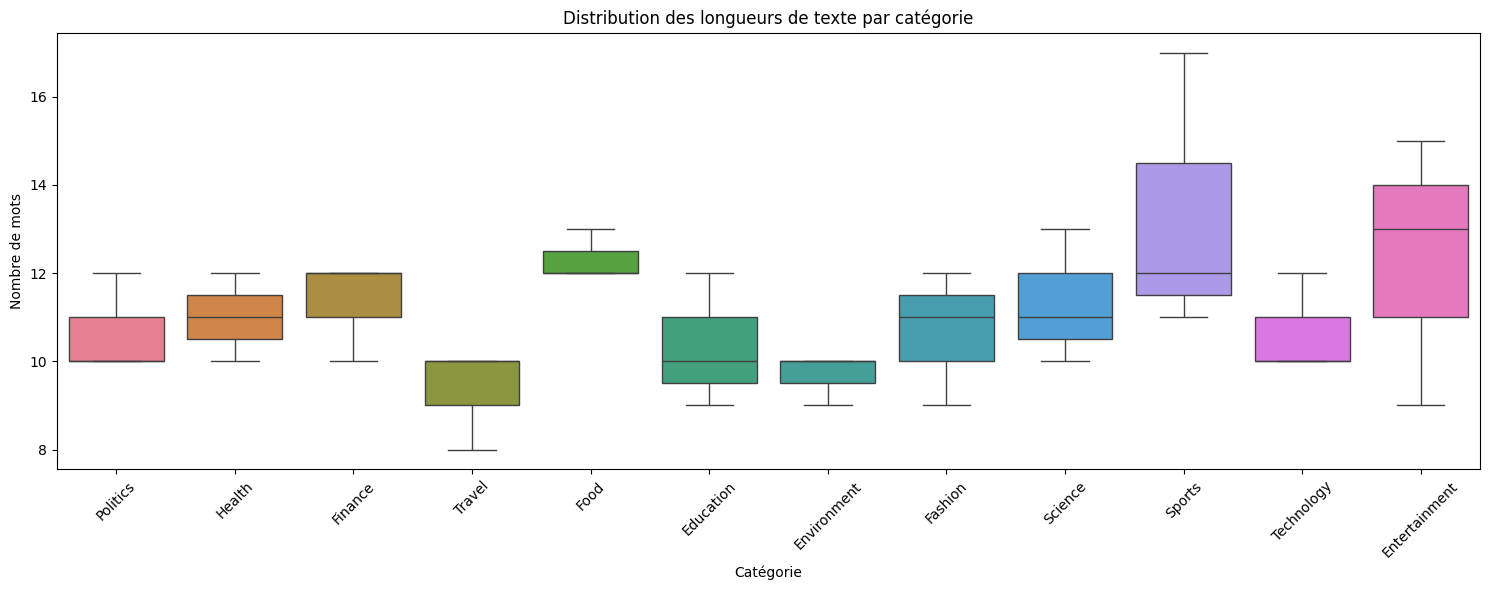

In [16]:

def plot_category_distributions(df):
    """
    Crée des visualisations de la distribution des longueurs de texte par catégorie
    """
    # Calculer les longueurs pour chaque catégorie
    lengths_dict = {}
    for category in df.columns:
        lengths_dict[category] = df[category].apply(lambda x: len(x.split()))
    
    # Créer un DataFrame avec les longueurs
    lengths_df = pd.DataFrame(lengths_dict)
    
    # Créer un boxplot
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=lengths_df)
    plt.xticks(rotation=45)
    plt.title('Distribution des longueurs de texte par catégorie')
    plt.xlabel('Catégorie')
    plt.ylabel('Nombre de mots')
    plt.tight_layout()
    plt.show()

plot_category_distributions(df_train)